## 1. 용량이 커서 사용할 컬럼만 추출후 저장

In [1]:
import pandas as pd

df_1 = pd.read_parquet('G:/내 드라이브/DataSet/_파킷 파일/서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2021.parquet', columns=['자전거번호', '대여대여소번호', '반납대여소번호', 
       '이용시간(분)', '이용거리(M)', '대여일자', '대여시간', '반납일자', '반납시간'])
df_2 = pd.read_parquet('G:/내 드라이브/DataSet/_파킷 파일/서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2022.parquet', columns=['자전거번호', '대여대여소번호', '반납대여소번호', 
       '이용시간(분)', '이용거리(M)', '대여일자', '대여시간', '반납일자', '반납시간'])
df_3 = pd.read_parquet('G:/내 드라이브/DataSet/_파킷 파일/서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2023.parquet', columns=['자전거번호', '대여대여소번호', '반납대여소번호', 
       '이용시간(분)', '이용거리(M)', '대여일자', '대여시간', '반납일자', '반납시간'])
df_4 = pd.read_parquet('G:/내 드라이브/DataSet/_파킷 파일/서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_2024.parquet', columns=['자전거번호', '대여대여소번호', '반납대여소번호', 
       '이용시간(분)', '이용거리(M)', '대여일자', '대여시간', '반납일자', '반납시간'])

#excel = pd.concat([excel, df], ignore_index=True)

## 2. concat으로 데이터프레임 합친다.

In [3]:
df = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [5]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


## 3. parquet으로 저장

In [7]:
df.to_parquet('G:/내 드라이브/DataSet/_파킷 파일/서울특별시 공공자전거 대여이력 정보/서울특별시 공공자전거 대여이력 정보_21~24.parquet', engine='pyarrow', compression='gzip')

## 4. parquet 파일 불러오기

In [1]:
import time
import pandas as  pd

start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\'
filename = '서울특별시 공공자전거 대여이력 정보_21~24'
df = pd.read_parquet(filepath + filename + '.parquet')
print("read_parquet time :", time.time() - start_time)

read_parquet time : 92.20128440856934


In [11]:
# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기
import ExcelFile_Merge as em
import ExcelFile_Read as er

In [15]:
import ExcelFile_EDA as ee
ee.ss_isnull(df)

,[컬럼명],[sum],[sum_isnull],[mean_isnull(%)]
0,자전거번호,140876284,0,0.000000
1,대여대여소번호,140876284,0,0.000000
2,반납대여소번호,140493981,382303,0.271375
3,이용시간(분),140876284,0,0.000000
4,이용거리(M),140876161,123,0.000087
5,대여일자,140876284,0,0.000000
6,대여시간,140876284,0,0.000000
7,반납일자,140876284,0,0.000000
8,반납시간,140876284,0,0.000000


In [3]:
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,대여시간,반납일자,반납시간
0,SPB-53145,00003,00668,25.0,0.00,2021-01-02,20:50:36,2021-01-02,21:15:41
1,SPB-53074,00003,00668,14.0,0.00,2021-01-04,16:02:12,2021-01-04,16:17:06
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13,21:02:05,2021-01-13,21:14:04
3,SPB-52380,00003,00668,10.0,0.00,2021-01-14,21:02:55,2021-01-14,21:13:41
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18,18:02:08,2021-01-18,18:15:22
...,...,...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.00,2024-06-30,22:42:25,2024-07-02,11:24:51
140876280,SPB-57512,04217,None,60.0,32253.00,2024-06-30,21:46:13,2024-07-02,11:25:54
140876281,SPB-50402,03569,None,870.0,848.00,2024-06-30,23:57:41,2024-07-02,13:00:21
140876282,SPB-56869,02547,None,870.0,2119.00,2024-06-30,18:35:04,2024-07-02,13:00:59


In [5]:
df = df.drop(['대여시간', '반납일자', '반납시간'], axis=1)

In [7]:
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자
0,SPB-53145,00003,00668,25.0,0.00,2021-01-02
1,SPB-53074,00003,00668,14.0,0.00,2021-01-04
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13
3,SPB-52380,00003,00668,10.0,0.00,2021-01-14
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.00,2024-06-30
140876280,SPB-57512,04217,None,60.0,32253.00,2024-06-30
140876281,SPB-50402,03569,None,870.0,848.00,2024-06-30
140876282,SPB-56869,02547,None,870.0,2119.00,2024-06-30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140876284 entries, 0 to 140876283
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여대여소번호  object 
 2   반납대여소번호  object 
 3   이용시간(분)  float64
 4   이용거리(M)  float64
 5   대여일자     object 
dtypes: float64(2), object(4)
memory usage: 6.3+ GB


In [11]:
pd.options.display.float_format = '{:3}'.format
round(df.describe(), 1)

,이용시간(분),이용거리(M)
count,140876284.0,140876161.0
mean,22.1,2505.9
std,28.7,3201.6
min,-15.0,0.0
25%,6.0,790.0
50%,12.0,1463.0
75%,28.0,2870.0
max,20010.5,733682.0


## 4. NULL값 있는 '반납대여소번호' 컬럼, '이용거리(M)' 컬럼 확인하기

- '반납대여소번호' null값 확인

In [13]:
df[df['반납대여소번호'].isnull()]

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자
49064993,SPB-33395,02277,None,42.0,0.0,2022-07-01
49065002,SPB-53713,04600,None,54.0,0.0,2022-07-01
49065865,SPB-40778,03582,None,65.0,0.0,2022-07-01
49065940,SPB-53857,00236,None,55.0,0.0,2022-07-01
49066020,SPB-54473,01684,None,54.0,0.0,2022-07-01
...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30


- 자전거번호 추출해서 저장하기 

In [15]:
df['자전거번호_추출'] = df['자전거번호'].str[4:]
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출
0,SPB-53145,00003,00668,25.0,0.0,2021-01-02,53145
1,SPB-53074,00003,00668,14.0,0.0,2021-01-04,53074
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13,50952
3,SPB-52380,00003,00668,10.0,0.0,2021-01-14,52380
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18,52380
...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869


- 대여가 이루어진 자전거를 확인. 하지만, 자전거가 선택되었다는 것은 신형일 것이다. 따라서 대여횟수를 확인해야하기 때문에
  null값을 제거하지 않는다.

In [17]:
df['대여일자'] = pd.to_datetime(df['대여일자'])

In [19]:
df['대여일자'].dtype

dtype('<M8[ns]')

In [21]:
df['자전거번호_추출'].unique()

array(['53145', '53074', '50952', ..., '70189', '64848', '68910'],
      dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140876284 entries, 0 to 140876283
Data columns (total 7 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여대여소번호   object        
 2   반납대여소번호   object        
 3   이용시간(분)   float64       
 4   이용거리(M)   float64       
 5   대여일자      datetime64[ns]
 6   자전거번호_추출  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.3+ GB


- 각 자전거의 최초 대여일자 찾기

In [25]:
earliest_dates = df.groupby('자전거번호_추출')['대여일자'].min().reset_index()

In [27]:
earliest_dates

,자전거번호_추출,대여일자
0,00025,2021-04-06
1,00291,2021-01-01
2,00385,2021-01-01
3,00811,2021-01-11
4,00830,2021-01-14
...,...,...
47194,84996,2022-03-26
47195,84997,2022-03-31
47196,84998,2022-03-25
47197,84999,2022-03-25


In [29]:
earliest_dates = earliest_dates.rename(columns={'대여일자':'최초대여일자'})
earliest_dates

,자전거번호_추출,최초대여일자
0,00025,2021-04-06
1,00291,2021-01-01
2,00385,2021-01-01
3,00811,2021-01-11
4,00830,2021-01-14
...,...,...
47194,84996,2022-03-26
47195,84997,2022-03-31
47196,84998,2022-03-25
47197,84999,2022-03-25


In [31]:
earliest_dates.sort_values(by='자전거번호_추출')

,자전거번호_추출,최초대여일자
0,00025,2021-04-06
1,00291,2021-01-01
2,00385,2021-01-01
3,00811,2021-01-11
4,00830,2021-01-14
...,...,...
47194,84996,2022-03-26
47195,84997,2022-03-31
47196,84998,2022-03-25
47197,84999,2022-03-25


In [33]:
earliest_dates.sort_values(by='최초대여일자')

,자전거번호_추출,최초대여일자
23599,51724,2021-01-01
13374,41019,2021-01-01
13375,41020,2021-01-01
13379,41024,2021-01-01
13380,41025,2021-01-01
...,...,...
42032,70180,2024-04-21
42038,70187,2024-04-21
42039,70189,2024-04-22
36708,64848,2024-05-13


- 원본 데이터프레임에 최초대여일자 추가

In [35]:
df = df.merge(earliest_dates, on='자전거번호_추출', how='left')

In [37]:
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출,최초대여일자
0,SPB-53145,00003,00668,25.0,0.0,2021-01-02,53145,2021-01-02
1,SPB-53074,00003,00668,14.0,0.0,2021-01-04,53074,2021-01-02
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13,50952,2021-01-01
3,SPB-52380,00003,00668,10.0,0.0,2021-01-14,52380,2021-01-09
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18,52380,2021-01-09
...,...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120,2021-01-01
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512,2022-04-13
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402,2021-01-01
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869,2022-05-01


In [39]:
from datetime import datetime
df['기준일'] = pd.to_datetime(datetime.now().date())
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출,최초대여일자,기준일
0,SPB-53145,00003,00668,25.0,0.0,2021-01-02,53145,2021-01-02,2024-10-30
1,SPB-53074,00003,00668,14.0,0.0,2021-01-04,53074,2021-01-02,2024-10-30
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13,50952,2021-01-01,2024-10-30
3,SPB-52380,00003,00668,10.0,0.0,2021-01-14,52380,2021-01-09,2024-10-30
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18,52380,2021-01-09,2024-10-30
...,...,...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120,2021-01-01,2024-10-30
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512,2022-04-13,2024-10-30
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402,2021-01-01,2024-10-30
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869,2022-05-01,2024-10-30


In [41]:
df['사용일수'] = (df['기준일'] - df['최초대여일자']).dt.days

In [43]:
df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출,최초대여일자,기준일,사용일수
0,SPB-53145,00003,00668,25.0,0.0,2021-01-02,53145,2021-01-02,2024-10-30,1397
1,SPB-53074,00003,00668,14.0,0.0,2021-01-04,53074,2021-01-02,2024-10-30,1397
2,SPB-50952,00003,00668,11.0,1853.99,2021-01-13,50952,2021-01-01,2024-10-30,1398
3,SPB-52380,00003,00668,10.0,0.0,2021-01-14,52380,2021-01-09,2024-10-30,1390
4,SPB-52380,00003,00540,13.0,2291.05,2021-01-18,52380,2021-01-09,2024-10-30,1390
...,...,...,...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120,2021-01-01,2024-10-30,1398
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512,2022-04-13,2024-10-30,931
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402,2021-01-01,2024-10-30,1398
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869,2022-05-01,2024-10-30,913


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140876284 entries, 0 to 140876283
Data columns (total 10 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여대여소번호   object        
 2   반납대여소번호   object        
 3   이용시간(분)   float64       
 4   이용거리(M)   float64       
 5   대여일자      datetime64[ns]
 6   자전거번호_추출  object        
 7   최초대여일자    datetime64[ns]
 8   기준일       datetime64[ns]
 9   사용일수      int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 10.5+ GB


- 2024년 1월 1일부터 2024년 6월 30일까지의 데이터만 필터링

In [47]:
start_date = '2024-01-01'
end_date = '2024-06-30'
filtered_df = df[(df['대여일자'] >= start_date) & (df['대여일자'] <= end_date)]

In [49]:
filtered_df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출,최초대여일자,기준일,사용일수
118768743,SPB-46712,04804,01416,1.0,0.0,2024-01-01,46712,2021-02-26,2024-10-30,1342
118768744,SPB-35089,04169,00251,6.0,1147.58,2024-01-01,35089,2021-01-01,2024-10-30,1398
118768745,SPB-36386,00540,03509,3.0,642.13,2024-01-01,36386,2021-02-25,2024-10-30,1343
118768746,SPB-61278,01139,00701,4.0,830.0,2024-01-01,61278,2022-05-24,2024-10-30,890
118768747,SPB-36848,03416,00346,4.0,791.08,2024-01-01,36848,2021-01-10,2024-10-30,1389
...,...,...,...,...,...,...,...,...,...,...
140876279,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120,2021-01-01,2024-10-30,1398
140876280,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512,2022-04-13,2024-10-30,931
140876281,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402,2021-01-01,2024-10-30,1398
140876282,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869,2022-05-01,2024-10-30,913


- 자전거 번호별 대여 횟수 계산

In [51]:
rental_counts = filtered_df['자전거번호_추출'].value_counts().reset_index()
rental_counts

,자전거번호_추출,count
0,60816,1640
1,69996,1614
2,47367,1605
3,43523,1534
4,44743,1517
...,...,...
41868,82656,1
41869,52380,1
41870,32572,1
41871,35028,1


In [53]:
filtered_df = filtered_df.merge(rental_counts, on='자전거번호_추출', how='left')

In [57]:
filtered_df = filtered_df.rename(columns={'count':'2024년_대여횟수'})

In [59]:
filtered_df

,자전거번호,대여대여소번호,반납대여소번호,이용시간(분),이용거리(M),대여일자,자전거번호_추출,최초대여일자,기준일,사용일수,2024년_대여횟수
0,SPB-46712,04804,01416,1.0,0.0,2024-01-01,46712,2021-02-26,2024-10-30,1342,1129
1,SPB-35089,04169,00251,6.0,1147.58,2024-01-01,35089,2021-01-01,2024-10-30,1398,1124
2,SPB-36386,00540,03509,3.0,642.13,2024-01-01,36386,2021-02-25,2024-10-30,1343,435
3,SPB-61278,01139,00701,4.0,830.0,2024-01-01,61278,2022-05-24,2024-10-30,890,603
4,SPB-36848,03416,00346,4.0,791.08,2024-01-01,36848,2021-01-10,2024-10-30,1389,612
...,...,...,...,...,...,...,...,...,...,...,...
22107536,SPB-52120,00334,None,60.0,4348.0,2024-06-30,52120,2021-01-01,2024-10-30,1398,670
22107537,SPB-57512,04217,None,60.0,32253.0,2024-06-30,57512,2022-04-13,2024-10-30,931,682
22107538,SPB-50402,03569,None,870.0,848.0,2024-06-30,50402,2021-01-01,2024-10-30,1398,561
22107539,SPB-56869,02547,None,870.0,2119.0,2024-06-30,56869,2022-05-01,2024-10-30,913,678


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 파일의 경로를 지정합니다. 
# Windows의 경우 보통 'C:/Windows/Fonts/malgun.ttf'에 위치합니다.
font_path = 'C:/Windows/Fonts/malgun.ttf'  

# 폰트 속성 객체 생성
font_prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_7404\2786231788.py:17: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\u

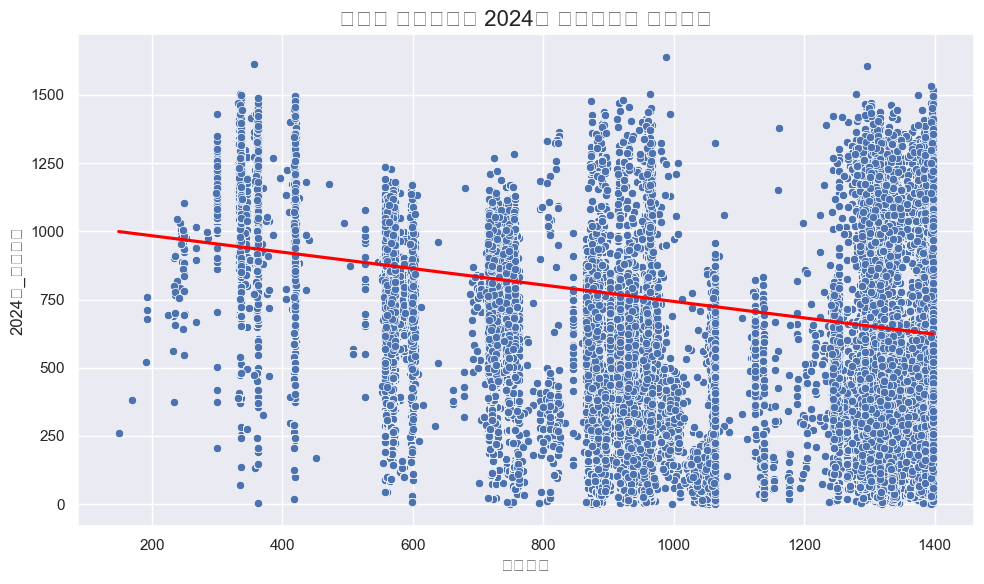

NameError: name 'correlatrion' is not defined

In [83]:
# 그래프 스타일 설정
sns.set_theme()
plt.figure(figsize=(10,6))

# 산점도 그리기
sns.scatterplot(x='사용일수', y='2024년_대여횟수', data=filtered_df)

# 추세선 그리기
sns.regplot(x='사용일수', y='2024년_대여횟수', data=filtered_df, scatter=False, color='red')

# 그래프 제목과 축 레이블 설정
plt.title('자전거 사용일수와 2024년 대여횟수의 상관관계', fontsize=16)
plt.xlabel('사용일수', fontsize=12)
plt.ylabel('2024년_대여횟수', fontsize=12)

# 그래프 표시
plt.tight_layout()
plt.show()

# 상관계수 계산
correlation = filtered_df['사용일수'].corr(filtered_df['2024년_대여횟수'])
print(f"사용일수와 대여횟수의 상관계수: {correlatrion:.2f}")

## 히트맵

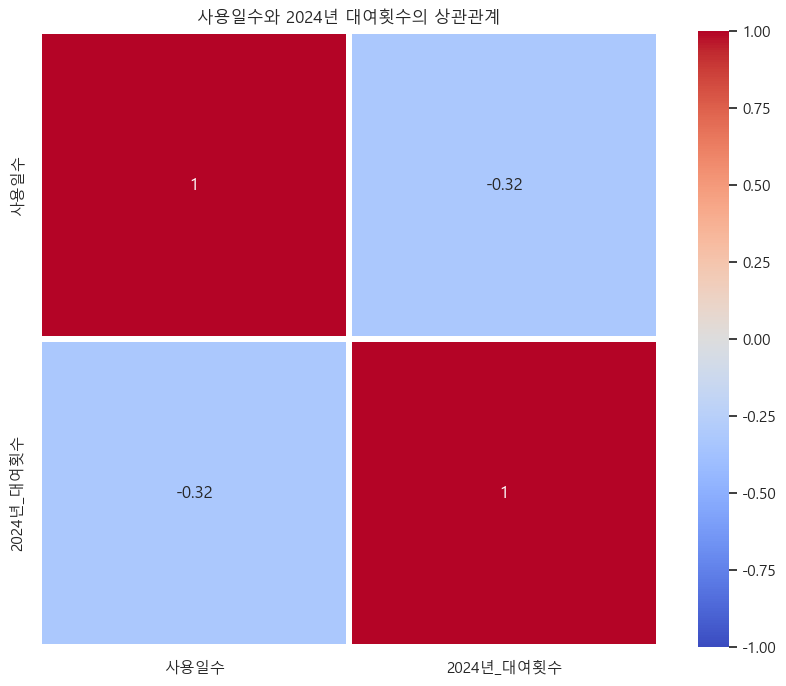

In [78]:
# 상관관계 계산
correlation = filtered_df[['사용일수', '2024년_대여횟수']].corr()

# 히트맵 그리기ㅡㅋㅋI 
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=3)
plt.title('사용일수와 2024년 대여횟수의 상관관계')
plt.show()

## 라인플롯

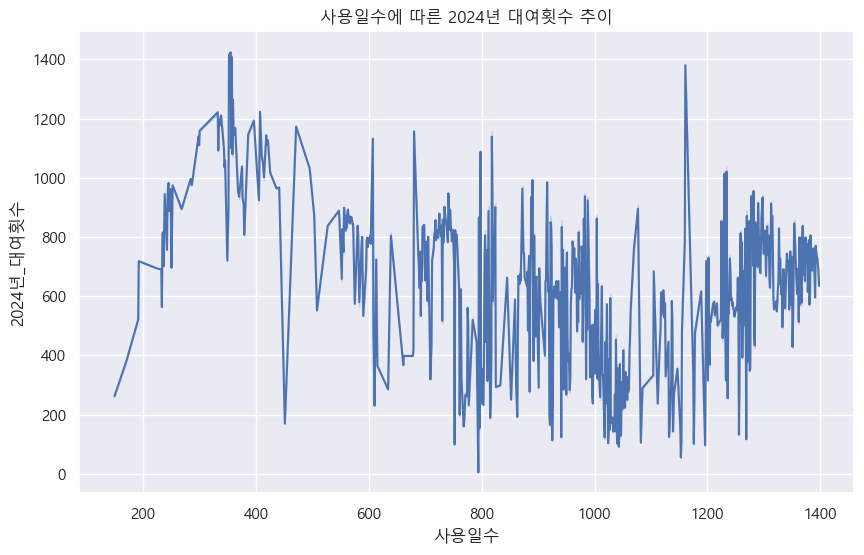

In [80]:
# 라인 플롯 그리기

plt.figure(figsize=(10,6))
sns.lineplot(x='사용일수', y='2024년_대여횟수', data=filtered_df)
plt.title('사용일수에 따른 2024년 대여횟수 추이')
plt.xlabel('사용일수')
plt.ylabel('2024년_대여횟수')
plt.show()